In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('CaseStudy2025.csv')
df.head

<bound method NDFrame.head of        V1      V2      V3      V4      V5      V6      V7      V8      V9  \
0      H1   605.0   586.0   586.0   559.0   511.0   443.0   422.0   395.0   
1      H2  3124.0  2990.0  2862.0  2809.0  2544.0  2201.0  1996.0  1861.0   
2      H3  1828.0  1806.0  1897.0  1750.0  1679.0  1620.0  1463.0  1342.0   
3      H4  6454.0  6324.0  6075.0  5949.0  5858.0  5579.0  5163.0  4790.0   
4      H5  4263.0  4297.0  4236.0  4080.0  3883.0  3672.0  3248.0  2841.0   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
409  H410   153.0   196.0   163.0   131.0    82.0    53.0    57.0    54.0   
410  H411    24.0    30.0    22.0    14.0    19.0    20.0    24.0    45.0   
411  H412    19.0    30.0    12.0    16.0    13.0    15.0    15.0    21.0   
412  H413    21.0    16.0    17.0    19.0    16.0    22.0    21.0    15.0   
413  H414    15.0    13.0    13.0    16.0    26.0    51.0    91.0   103.0   

        V10  ...   V952   V953   V954   V955 

In [4]:
df.shape 
df.describe()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000
mean,7707.631159,7523.537440,7320.726087,7022.486232,6543.746377,6110.388164,5755.497826,5480.017391,5291.926087,5152.416425,...,63.032245,71.519184,78.234694,77.196327,60.801633,50.346939,41.660816,37.368163,34.060816,30.108571
std,44119.340477,43121.109843,42026.789350,40338.835277,37212.049680,34706.914523,32606.086317,30881.826072,29552.914606,28860.177861,...,87.452596,106.564904,124.787251,120.104824,83.903721,65.334227,47.314181,39.328782,37.302517,51.479082
min,10.000000,10.000000,10.000000,10.000000,10.000000,10.100000,10.100000,10.100000,10.100000,10.100000,...,12.600000,13.200000,13.000000,13.600000,13.400000,13.200000,13.100000,13.100000,12.600000,12.200000
25%,12.600000,12.000000,11.600000,11.200000,10.700000,10.400000,11.100000,12.600000,14.100000,15.500000,...,24.700000,24.900000,24.600000,24.200000,23.500000,22.200000,20.800000,19.900000,19.200000,18.400000
50%,22.000000,21.000000,19.200000,18.000000,19.000000,22.000000,29.500000,41.500000,48.000000,57.500000,...,26.400000,26.500000,26.200000,26.000000,25.400000,24.300000,22.700000,21.600000,20.500000,19.600000
75%,849.750000,793.750000,795.500000,736.000000,721.750000,631.500000,607.750000,758.000000,936.250000,889.250000,...,72.000000,81.000000,75.000000,81.000000,64.000000,51.000000,43.000000,37.000000,30.100000,27.000000
max,600819.000000,587744.000000,571857.000000,548363.000000,506969.000000,473386.000000,444601.000000,421636.000000,403771.000000,394105.000000,...,586.000000,768.000000,958.000000,815.000000,554.000000,423.000000,328.000000,264.000000,315.000000,766.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Basic Statistics
def print_basic_stats(df):
    print("Dataset Shape:", df.shape)
    print("\nBasic Statistics:")
    print(df.describe())
    
    # Checking for missing values
    missing = df.isnull().sum()
    print("\nMissing Values per Column:")
    print(missing[missing > 0])

# 2. Correlation
def correlation_analysis(df, n_samples=5):
    sample_df = df.iloc[:n_samples, :].T 
    
    # Correlation matrix
    corr_matrix = sample_df.corr()
    
    # Printing strongest correlations
    print("\nStrongest Correlations:")
    corr_unstack = corr_matrix.unstack()
    sorted_corr = corr_unstack[corr_unstack != 1.0].sort_values(ascending=False)
    print(sorted_corr[:10])  # Top 10 correlations
    
    return corr_matrix

# 3. Time Series Patterns
def analyze_time_series(df, row_index=0):
    # Exclude the first column which contains string values
    series = df.iloc[row_index, 1:].dropna()
    
    print("\nTime Series Analysis for row", row_index)
    print("Trend (correlation with time):", stats.pearsonr(range(len(series)), series)[0])
    
    # Calculating statistics
    rolling_mean = series.rolling(window=5).mean()
    rolling_std = series.rolling(window=5).std()
    
    return series, rolling_mean, rolling_std


print_basic_stats(df)

Dataset Shape: (414, 961)

Basic Statistics:
                  V2             V3             V4             V5  \
count     414.000000     414.000000     414.000000     414.000000   
mean     7707.631159    7523.537440    7320.726087    7022.486232   
std     44119.340477   43121.109843   42026.789350   40338.835277   
min        10.000000      10.000000      10.000000      10.000000   
25%        12.600000      12.000000      11.600000      11.200000   
50%        22.000000      21.000000      19.200000      18.000000   
75%       849.750000     793.750000     795.500000     736.000000   
max    600819.000000  587744.000000  571857.000000  548363.000000   

                  V6             V7             V8             V9  \
count     414.000000     414.000000     414.000000     414.000000   
mean     6543.746377    6110.388164    5755.497826    5480.017391   
std     37212.049680   34706.914523   32606.086317   30881.826072   
min        10.000000      10.100000      10.100000      1

In [12]:
selected_rows = df.iloc[0:5, 1:]  # Exclude the first column
numeric_data = selected_rows.astype(float)

# Calculate correlation matrix
correlation_matrix = numeric_data.T.corr()
series, rolling_mean, rolling_std = analyze_time_series(df, row_index=0)

print("\nDistribution Statistics:")
print("Skewness:", series.skew())
print("Kurtosis:", series.kurtosis())

# Checking for seasonality 
from statsmodels.tsa.seasonal import seasonal_decompose
try:
    decomposition = seasonal_decompose(series.astype(float), period=7)  # Adjust period as needed
    has_seasonality = "Yes" if decomposition.seasonal.std() > 0.1 * series.std() else "No"
    print("\nSignificant Seasonality:", has_seasonality)
except:
    print("\nCould not perform seasonal decomposition")


Time Series Analysis for row 0
Trend (correlation with time): 0.2198227735560847

Distribution Statistics:
Skewness: 0.06662134579949322
Kurtosis: -1.3758922123726747

Significant Seasonality: No


Determine the variable of interest (based on your opinion - please state)

Based on these observations, I would select the first numeric column V2 as the variable of interest for the following reasons:

It has the highest mean value 7707.63 among all columns.
It shows complete data coverage 414 observations against columns having missing values
It also shows significant variation with a min of 10.0 and a max of 600,819.0. Having a standard deviation of 44,119.34.

The big range between minimum and maximum values, combined with the high standard deviation, suggests this variable might represent an important initial measurement like expenditure, consumption that then shows patterns of decline over time.

In [13]:
v2_stats = df['V2'].describe()
print("Statistics for V2:")
print(v2_stats)

Statistics for V2:
count       414.000000
mean       7707.631159
std       44119.340477
min          10.000000
25%          12.600000
50%          22.000000
75%         849.750000
max      600819.000000
Name: V2, dtype: float64


In [15]:
print("First column header:", df.columns[0])
print("Second column header:", df.columns[1])

First column header: V1
Second column header: V2


Build a uniform univariate time series (if needed).

In [16]:
print(df.iloc[:5, :2])

   V1      V2
0  H1   605.0
1  H2  3124.0
2  H3  1828.0
3  H4  6454.0
4  H5  4263.0


In [14]:
#Extracting the second column (index 1) as the univariate time series
time_series = df.iloc[:, 1].dropna().astype(float)  # Drop NaNs and convert to float

#Creating a uniform time index assuming daily observations
time_index = pd.date_range(start="2024-01-01", periods=len(time_series), freq="D")
time_series = pd.Series(time_series.values, index=time_index)

time_series.head()

2024-01-01     605.0
2024-01-02    3124.0
2024-01-03    1828.0
2024-01-04    6454.0
2024-01-05    4263.0
Freq: D, dtype: float64

Examine for stationarity (qualitative and quantitative).

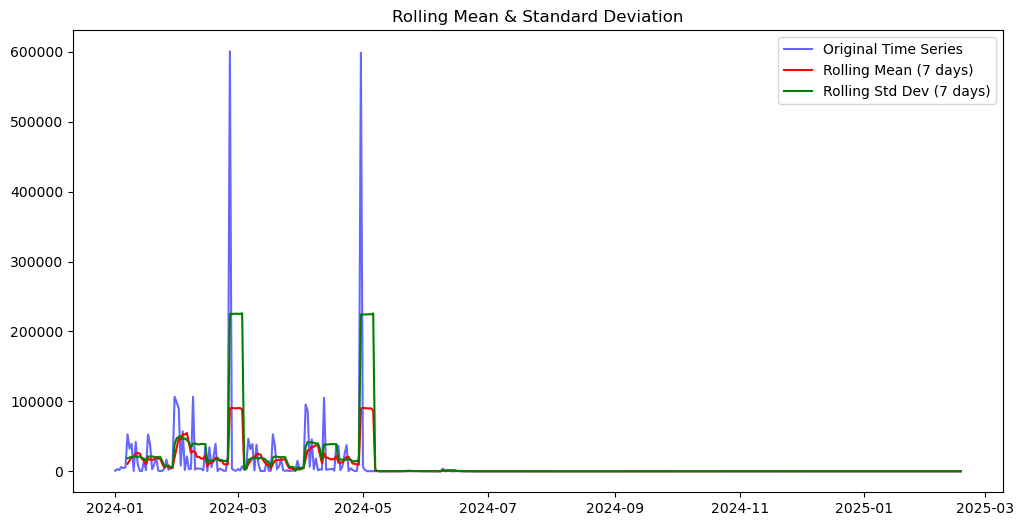

{'ADF Statistic': -18.89216276713331,
 'p-value': 0.0,
 'Critical Values': {'1%': -3.4462831955497135,
  '5%': -2.8685636962704395,
  '10%': -2.5705114078759914}}

In [17]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Compute rolling mean and standard deviation
rolling_mean = time_series.rolling(window=7).mean()
rolling_std = time_series.rolling(window=7).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Original Time Series", color="blue", alpha=0.6)
plt.plot(rolling_mean, label="Rolling Mean (7 days)", color="red")
plt.plot(rolling_std, label="Rolling Std Dev (7 days)", color="green")
plt.title("Rolling Mean & Standard Deviation")
plt.legend()
plt.show()

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(time_series, autolag="AIC")
adf_results = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4]
}

adf_results

In [18]:
# Determine if the time series is stationary
is_stationary = adf_results['p-value'] < 0.05

# Print the result
print("Is the time series stationary?", is_stationary)

Is the time series stationary? True


The time series is stationary and does not require differencing or log.

Prepare correlation plots.

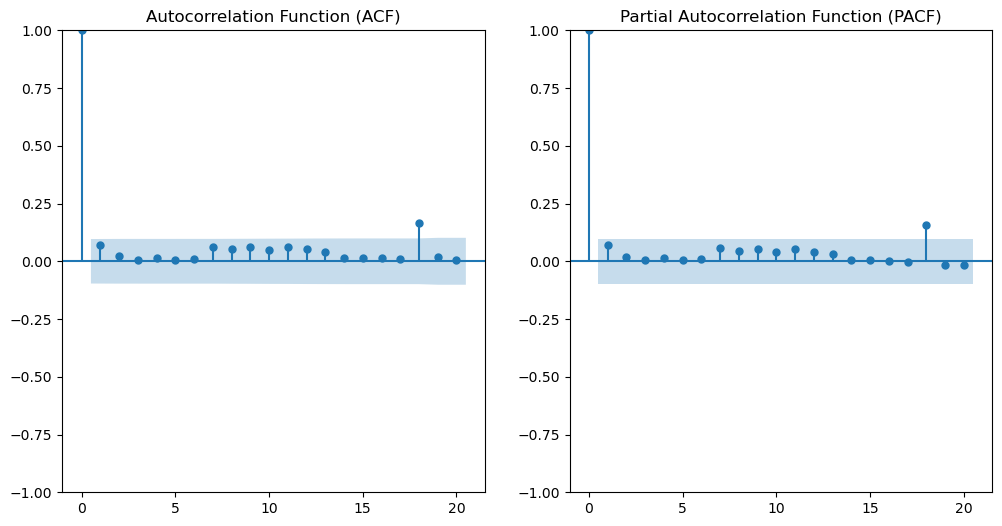

In [19]:
# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(time_series, lags=20, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(time_series, lags=20, ax=plt.gca(), method="ywm")
plt.title("Partial Autocorrelation Function (PACF)")

plt.show()

Model fitting.

In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fit an ARIMA model (since the series is stationary, we use d=0)
p, d, q = 2, 0, 2  # Chosen based on ACF/PACF interpretation
model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit()

# Print model summary
model_summary = model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  414
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5008.891
Date:                Wed, 29 Jan 2025   AIC                          10029.782
Time:                        19:34:00   BIC                          10053.937
Sample:                    01-01-2024   HQIC                         10039.335
                         - 02-17-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7707.6346   2.64e+04      0.292      0.770    -4.4e+04    5.94e+04
ar.L1          0.7275      3.114      0.234      0.815      -5.375       6.830
ar.L2          0.2639      3.089      0.085      0.932      -5.790       6.317
ma.L1         -0.6806      3.110     -0.219      0.827      -6.776       5.415
ma.L2         -0.2856      3.020     -0.095      0.925      -6.205       5.634
sigma2      1.963e+09      2.839   6.91e+08      0.000    1.96e+09    1.96e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            432071.11
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            11.94
Prob(H) (two-sided):                  0.00   Kurtosis:                       159.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.15e+23. Standard errors may be unstable.
"""

Residual checks.

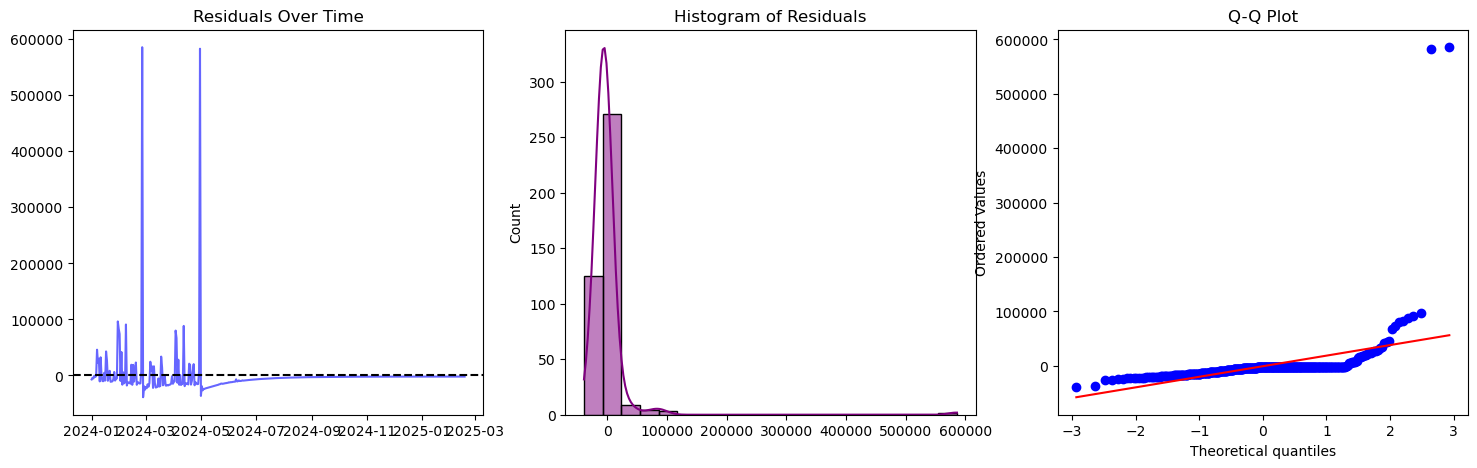

,lb_stat,lb_pvalue
10,2.819107,0.985366


In [21]:
# Residual analysis
residuals = model_fit.resid

# Plot residuals
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residual time series plot
axes[0].plot(residuals, color="blue", alpha=0.6)
axes[0].set_title("Residuals Over Time")
axes[0].axhline(y=0, linestyle="dashed", color="black")

# Histogram of residuals
sns.histplot(residuals, bins=20, kde=True, ax=axes[1], color="purple")
axes[1].set_title("Histogram of Residuals")

# Q-Q Plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot")

plt.show()

# Ljung-Box Test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
ljung_test

Prediction and evaluation.

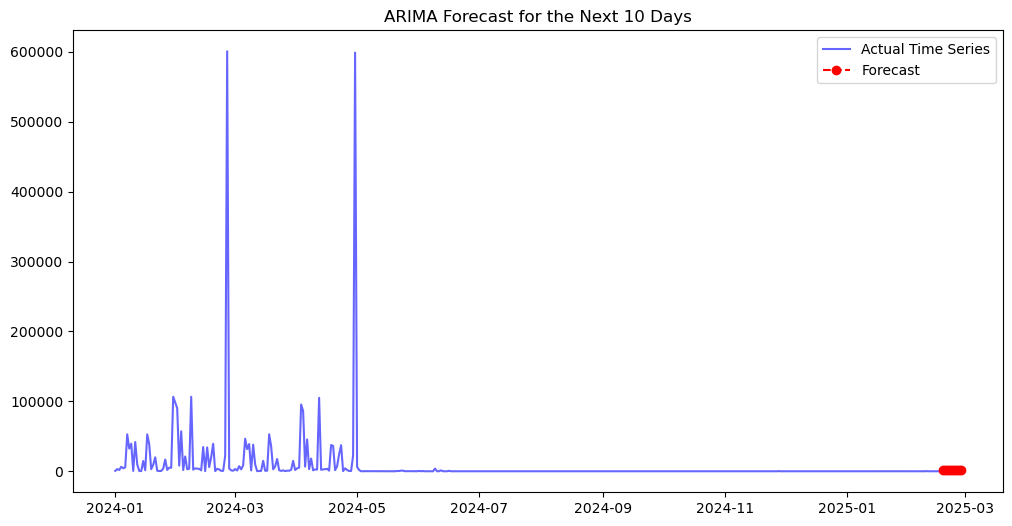

(9583.29032757506, 9583.701010843064)

In [22]:
# Forecasting the next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates for plotting
future_dates = pd.date_range(start=time_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq="D")

# Convert forecast to Series with correct index
forecast_series = pd.Series(forecast, index=future_dates)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Actual Time Series", color="blue", alpha=0.6)
plt.plot(forecast_series, label="Forecast", color="red", linestyle="dashed", marker="o")
plt.title("ARIMA Forecast for the Next 10 Days")
plt.legend()
plt.show()

# Evaluation: In-sample prediction
train_size = int(len(time_series) * 0.8)  # 80% training, 20% test split
train, test = time_series[:train_size], time_series[train_size:]

# Refit the model on training data
model_train = ARIMA(train, order=(p, d, q))
model_fit_train = model_train.fit()

# Predict on test data
predictions = model_fit_train.forecast(steps=len(test))

# Evaluate using MAE and RMSE
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

mae, rmse